# **Transform Photos to Sketches and Paintings with OpenCV**


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

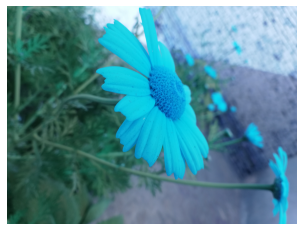

In [2]:
img = cv2.imread("./images/flower.jpg") 
plt.axis('off')
plt.imshow(img)

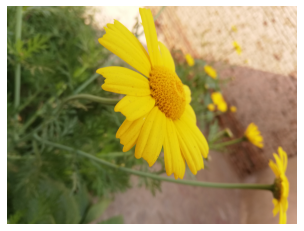

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_rgb)

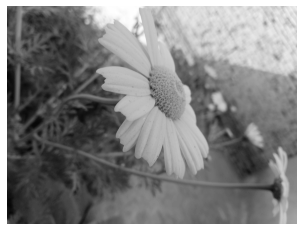

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray, cmap = 'gray')

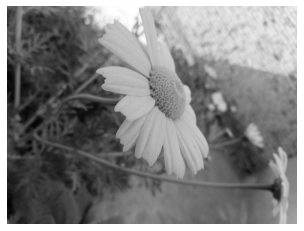

In [5]:
blur = cv2.GaussianBlur(gray,(5,5), 4)
plt.axis('off')
plt.imshow(blur, cmap = 'gray')

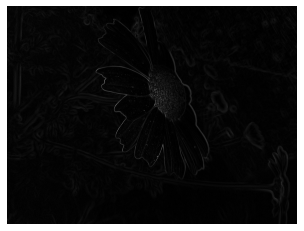

In [6]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5) # Change in horizonal direction, dx
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5) # Change in verticle direction, dy
gradmag_sq = np.square(sobelx)+np.square(sobely) # Square the images element-wise and then add them together 
gradmag = np.sqrt(gradmag_sq) # Take the square root of the resulting image element-wise to get the gradient magnitude
plt.axis('off')
plt.imshow(gradmag, cmap ='gray')

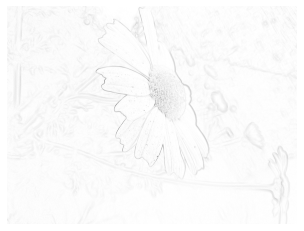

In [7]:
gradmag_inv = 255-gradmag
plt.axis('off')
plt.imshow(gradmag_inv, cmap = "gray")

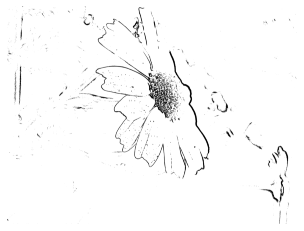

In [8]:
thresh_value, thresh_img = cv2.threshold(gradmag_inv,10,255,cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(thresh_img, cmap = 'gray')

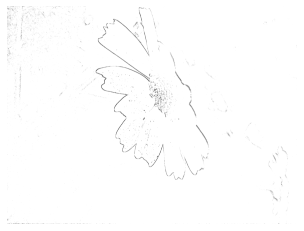

In [9]:
pencilsketch_gray, pencilsketch_color  = cv2.pencilSketch(img_rgb, sigma_s=60, sigma_r=0.07, shade_factor=0.05) 
plt.axis('off')
plt.imshow(pencilsketch_gray, cmap ='gray')

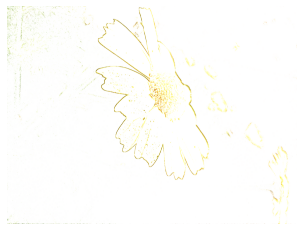

In [10]:
plt.axis('off')
plt.imshow(pencilsketch_color)

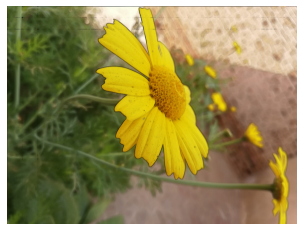

In [11]:
waterpainting = cv2.stylization(img_rgb, sigma_s=3, sigma_r=3)
plt.axis('off')
plt.imshow(waterpainting)